<a href="https://colab.research.google.com/github/pshvaa/House-prices/blob/main/House_prices_self_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/CPIAUCSL.csv
#US CPI (inflasion measure)
!wget https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/MORTGAGE30US.csv
#morgage interest rates, weekly
!wget https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/Metro_median_sale_price_uc_sfrcondo_week.csv
#median sale prices for us houses (from Zillow)
!wget https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/RRVRUSQ156N.csv
#rental vacancy rate, quarterly
!wget https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv
#Zillow home value index

--2024-07-14 09:33:49--  https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/CPIAUCSL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15682 (15K) [text/plain]
Saving to: ‘CPIAUCSL.csv’

CPIAUCSL.csv        100%[===================>]  15.31K  --.-KB/s    in 0s      

2024-07-14 09:33:49 (70.4 MB/s) - ‘CPIAUCSL.csv’ saved [15682/15682]

--2024-07-14 09:33:49--  https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/house_prices/MORTGAGE30US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
fed_files = ['MORTGAGE30US.csv', 'RRVRUSQ156N.csv', 'CPIAUCSL.csv']
dfs = [pd.read_csv(f, parse_dates = True, index_col = 0) for f in fed_files]

In [ ]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [ ]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [ ]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [ ]:
fed_data = pd.concat(dfs, axis = 1)

In [ ]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,NaN,NaN,278.524
2021-11-04,3.09,NaN,NaN
2021-11-10,2.98,NaN,NaN
2021-11-18,3.10,NaN,NaN
2021-11-24,3.10,NaN,NaN
2021-12-01,NaN,NaN,280.126
2021-12-02,3.11,NaN,NaN
2021-12-09,3.10,NaN,NaN
2021-12-16,3.12,NaN,NaN


In [ ]:
fed_data = fed_data.ffill() #forward fill in pandas

In [ ]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


In [ ]:
zillow_files = ['Metro_median_sale_price_uc_sfrcondo_week.csv', 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv']
dfs = [pd.read_csv(f) for f in zillow_files]

In [ ]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [ ]:
dfs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92899.038250,92999.754549,97296.415265,98217.639150,100010.331287,101084.700150,101376.966610,103321.694906,105794.451088,106244.149398
909,753874,930,"Craig, CO",Msa,CO,66532.401041,66795.083062,67178.691523,67680.532389,67149.040671,...,244845.354879,245187.643589,253767.119261,254926.311559,253700.139970,255387.314731,254937.506748,256166.409003,266655.039121,268370.634013
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,169404.973627,171295.739580,178176.871040,178929.217811,179113.938659,181811.015503,184752.025925,187573.847282,192967.342193,193366.794326
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80043.974772,80196.507293,NaN,86966.994296,88535.643138,88556.495891,88921.719463,89261.931509,92129.408692,93197.602418


In [ ]:
dfs = [pd.DataFrame(df.iloc[0, 5:]) for df in dfs]

In [ ]:
dfs[1]

,0
1996-01-31,108641.264685
1996-02-29,108472.72888
1996-03-31,108532.280074
1996-04-30,108739.077466
1996-05-31,108986.621607
...,...
2022-03-31,344042.433111
2022-04-30,350515.841789
2022-05-31,354717.722904
2022-06-30,357473.327397


In [ ]:
for df in dfs:
  df.index = pd.to_datetime(df.index)
  df['month'] = df.index.to_period('M')

In [ ]:
price_data = dfs[0].merge(dfs[1], on = 'month')

In [ ]:
price_data.index = dfs[0].index

In [ ]:
price_data

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [ ]:
del price_data['month']
price_data.columns = ['price', 'value']

In [ ]:
price_data

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


In [ ]:
fed_data.isnull().sum()

MORTGAGE30US    292
RRVRUSQ156N     108
CPIAUCSL          0
dtype: int64

In [ ]:
fed_data.shape

(3507, 3)

In [ ]:
fed_data = fed_data.dropna()

In [ ]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-21,5.11,5.6,288.663
2022-04-28,5.10,5.6,288.663
2022-05-01,5.10,5.6,291.474
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474
2022-05-26,5.10,5.6,291.474
2022-06-01,5.10,5.6,295.328
2022-06-02,5.09,5.6,295.328


In [ ]:
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days = 2)

In [ ]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-23,5.11,5.6,288.663
2022-04-30,5.10,5.6,288.663
2022-05-03,5.10,5.6,291.474
2022-05-07,5.27,5.6,291.474
2022-05-14,5.30,5.6,291.474
2022-05-21,5.25,5.6,291.474
2022-05-28,5.10,5.6,291.474
2022-06-03,5.10,5.6,295.328
2022-06-04,5.09,5.6,295.328


In [ ]:
price_data = fed_data.merge(price_data, left_index = True, right_index = True)

In [ ]:
price_data.columns = ['interest', 'vacancy', 'cpi', 'price', 'value']

**Setting up machine_learning target**

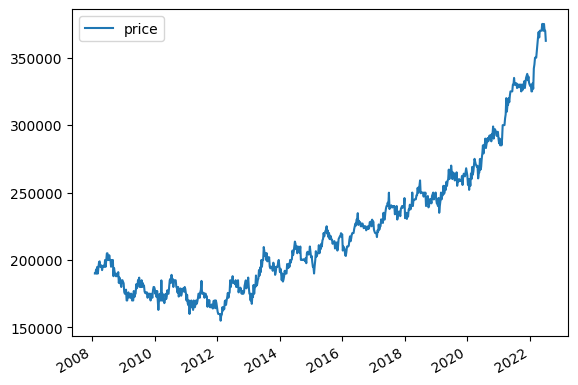

In [ ]:
price_data.plot.line(y = 'price', use_index = True);

In [ ]:
price_data['adj_price'] = price_data['price'] / price_data['cpi'] * 100

<Axes: >

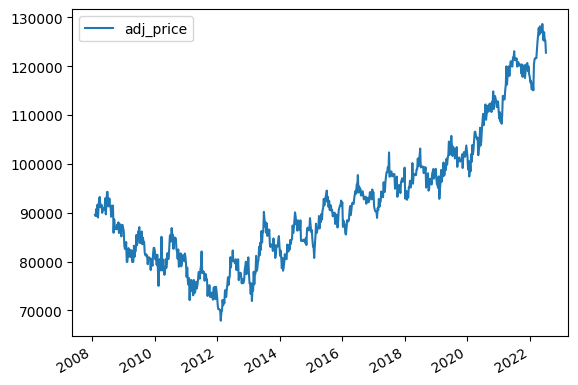

In [ ]:
price_data.plot.line(y = 'adj_price', use_index = True)

In [ ]:
price_data['adj_value'] = price_data['value'] / price_data['cpi'] * 100

<Axes: >

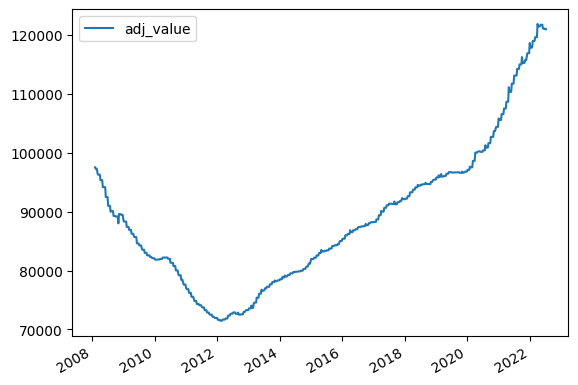

In [ ]:
price_data.plot.line(y = 'adj_value', use_index = True)

In [ ]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [ ]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397,126977.462347,121042.815919,None
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636,125284.429516,120918.867035,None


In [ ]:
price_data.dropna(inplace = True)

In [ ]:
price_data["change"] = (price_data['next_quarter'] > price_data["adj_price"]).astype(int)

In [ ]:
price_data['change'].value_counts()

change
1    379
0    343
Name: count, dtype: int64

In [ ]:
predictors = ['interest', 'vacancy', 'adj_value', 'adj_price']
target = 'change'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def predict(train, test, predictors, target):
  rfc = RandomForestClassifier(min_samples_split = 10, random_state = 42)
  rfc.fit(train[predictors], train[target])
  preds = rfc.predict(test[predictors])
  return preds

In [ ]:
START = 260 #there is 260 weeks in 5 year
STEP = 52 #there is 52 weeks in a year

def backtest(data, predictors, target):
  all_preds = []
  for i in range(START, data.shape[0], STEP):
    train = price_data.iloc[:i]
    test = price_data.iloc[i : (i+STEP)]
    all_preds.append(predict(train, test, predictors, target))

  preds = np.concatenate(all_preds)
  return preds, accuracy_score(data.iloc[START:][target], preds)

In [ ]:
preds, accuracy = backtest(price_data, predictors, target)

In [ ]:
accuracy

0.5974025974025974

In [ ]:
yearly = price_data.rolling(52, min_periods = 1).mean()

In [ ]:
yearly_ratios = [p + 'year' for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [ ]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,interestyear,vacancyyear,adj_valueyear,adj_priceyear
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1,0.999119,1.000000,0.998793,0.998793
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1,1.005272,1.000000,0.999195,1.009662
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1,1.045435,1.000000,0.999396,0.995075
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1,1.063032,1.000000,0.993996,1.016948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1,1.235955,0.977317,1.049231,1.021141
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1,1.326140,0.980494,1.047093,1.019749
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1,1.397289,0.983692,1.044965,1.03262
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1,1.462275,0.986911,1.062065,1.045474


In [ ]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [ ]:
accuracy

0.6428571428571429

In [ ]:
pred_match = (preds == price_data[target].iloc[START:])

In [ ]:
pred_match[pred_match == True] = 'green'
pred_match[pred_match == False] = 'red'

<Axes: xlabel='index', ylabel='adj_price'>

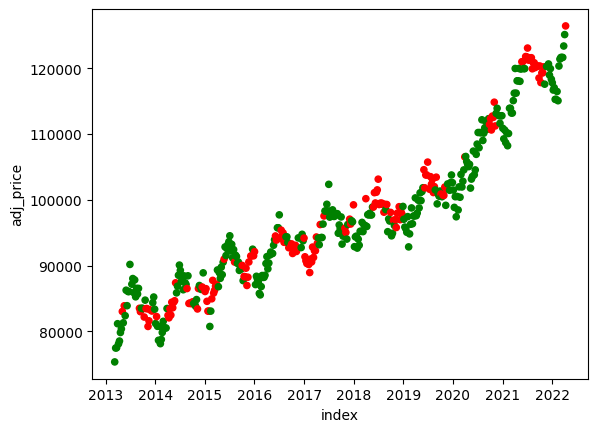

In [ ]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x = "index", y = "adj_price", color = pred_match)

In [ ]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split = 10, random_state = 42)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats = 10, random_state = 42)

In [ ]:
result['importances_mean']

array([0.14736842, 0.16828255, 0.34944598, 0.2867036 ])

In [ ]:
predictors

['interest', 'vacancy', 'adj_value', 'adj_price']